In [42]:
import pandas as pd

# Loading data from files
renewable_energy_data = pd.read_csv(country_capacity.csv')
gdp_data = pd.read_csv(Country, year, GDP 2015-2023.csv')


In [45]:
renewable_energy_data

,Country,Group_Technology,Technology,RE_or_Non_RE,Year,Electricity_Installed_Capacity__MW_
0,Albania,Bioenergy,Renewable municipal waste,Total Renewable,2017,1.425
1,Albania,Bioenergy,Renewable municipal waste,Total Renewable,2018,1.425
2,Albania,Bioenergy,Renewable municipal waste,Total Renewable,2019,1.425
3,Albania,Bioenergy,Renewable municipal waste,Total Renewable,2020,1.425
4,Albania,Bioenergy,Renewable municipal waste,Total Renewable,2021,1.425
...,...,...,...,...,...,...
4268,United Kingdom,Hydropower (excl. Pumped Storage),Renewable hydropower,Total Renewable,2019,1879.860
4269,United Kingdom,Hydropower (excl. Pumped Storage),Renewable hydropower,Total Renewable,2020,1885.264
4270,United Kingdom,Hydropower (excl. Pumped Storage),Renewable hydropower,Total Renewable,2021,1890.434
4271,United Kingdom,Hydropower (excl. Pumped Storage),Renewable hydropower,Total Renewable,2022,1890.434


In [41]:
gdp_data

,Country,Year,GDP
0,Albania,2015,11.387
1,Albania,2016,11.861
2,Albania,2017,13.020
3,Albania,2018,15.156
4,Albania,2019,15.402
...,...,...,...
373,United Kingdom,2019,2851.407
374,United Kingdom,2020,2697.807
375,United Kingdom,2021,3141.506
376,United Kingdom,2022,3089.073


In [46]:
# Створити pivot table
pivot_table = renewable_energy_data.pivot_table(index='Country', columns='RE_or_Non_RE', values='Electricity_Installed_Capacity__MW_', aggfunc='sum')

# Перейменувати стовпці для зручності
pivot_table.rename(columns={'Total Renewable': 'Total_Renewable', 'Total Non-Renewable': 'Total_Non_Renewable'}, inplace=True)

# Вивести результат
print(pivot_table)


RE_or_Non_RE            Total_Non_Renewable  Total_Renewable
Country                                                     
Albania                             880.850        20163.025
Andorra                              13.900          479.178
Austria                           47769.190       192021.329
Belarus                           91515.600         3665.460
Belgium                          127839.350        89553.600
Bosnia and Herzegovina            23360.120        17319.433
Bulgaria                          60863.928        41330.546
Croatia                           15521.400        28779.200
Cyprus                            13504.990         3641.232
Czechia                          155403.895        39911.488
Denmark                           53367.075        86509.218
Estonia                           16424.750         7520.090
Faroe Islands                       804.480          540.105
Finland                           84308.000        80993.000
France                  

In [48]:
# Розрахунок кореляції між стовпцями
correlation = pivot_table['Total_Renewable'].corr(pivot_table['Total_Non_Renewable'])

correlation_rounded = round(correlation, 2)

# Виведення результату
print("Correlation between Total Renewable and Total Non-Renewable energy:", correlation_rounded)


Correlation between Total Renewable and Total Non-Renewable energy: 0.88


In [49]:
# Кореляція 0.88 між виробленою відновлюваною та невідновлюваною енергією вказує на те, що в більшості країн зі збільшенням вироблення 
# одного типу енергії зазвичай також збільшується вироблення іншого типу. Це може свідчити про те, що країни в цілому розвивають свою енергетичну 
# інфраструктуру як за рахунок відновлюваних, так і за рахунок невідновлюваних джерел енергії. 
# Вироблення енергії з обох джерел може бути взаємопов'язаним через розвиток енергетичного сектора, і це може бути позитивним 
# знаком для сталого розвитку і диверсифікації джерел енергії в країнах.

In [58]:
# Групування за країною та обчислення середнього ВВП
average_gdp = gdp_data.groupby('Country')['GDP'].mean().reset_index()

# Виведення результату
print(average_gdp)


                   Country          GDP
0                  Albania    15.763111
1                  Andorra     3.146667
2                  Austria   445.124889
3                  Belarus    61.783111
4                  Belgium   539.809889
5   Bosnia and Herzegovina    20.901000
6                 Bulgaria    71.910222
7                  Croatia    62.334333
8                   Cyprus    25.681000
9                  Czechia   250.895333
10                 Denmark   359.185333
11                 Estonia    31.561778
12           Faroe Islands     3.226667
13                 Finland   270.207889
14                  France  2718.001556
15                 Germany  3895.605222
16                  Greece   207.676889
17                 Hungary   160.218333
18                 Iceland    24.419667
19                 Ireland   419.833444
20                   Italy  2007.486778
21                  Kosovo     8.105111
22                  Latvia    35.102222
23               Lithuania    57.218556


In [59]:
# Групування за країною та обчислення середнього значення виробленої енергії з відновлювальних джерел
average_renewable_energy = renewable_energy_data.groupby('Country')['Electricity_Installed_Capacity__MW_'].mean().reset_index()

# Виведення результату
print(average_renewable_energy)

                   Country  Electricity_Installed_Capacity__MW_
0                  Albania                           584.552083
1                  Andorra                            14.087943
2                  Austria                          1665.211937
3                  Belarus                          1535.178387
4                  Belgium                          1341.931790
5   Bosnia and Herzegovina                           473.018058
6                 Bulgaria                          1098.865312
7                  Croatia                           509.202299
8                   Cyprus                           336.200431
9                  Czechia                          1375.460444
10                 Denmark                          1075.971485
11                 Estonia                           272.100455
12           Faroe Islands                            32.794756
13                 Finland                          1836.677778
14                  France              

In [63]:
# Об'єднання таблиць по країні
merged_data = pd.merge(average_gdp, average_renewable_energy, on='Country')

# Розрахунок кореляції
correlation = merged_data['GDP'].corr(merged_data['Electricity_Installed_Capacity__MW_'])

correlation_rounded = round(correlation, 2)

# Виведення результату
print("Correlation between GDP and Renewable Energy Production:", correlation_rounded)



Correlation between GDP and Renewable Energy Production: 0.89


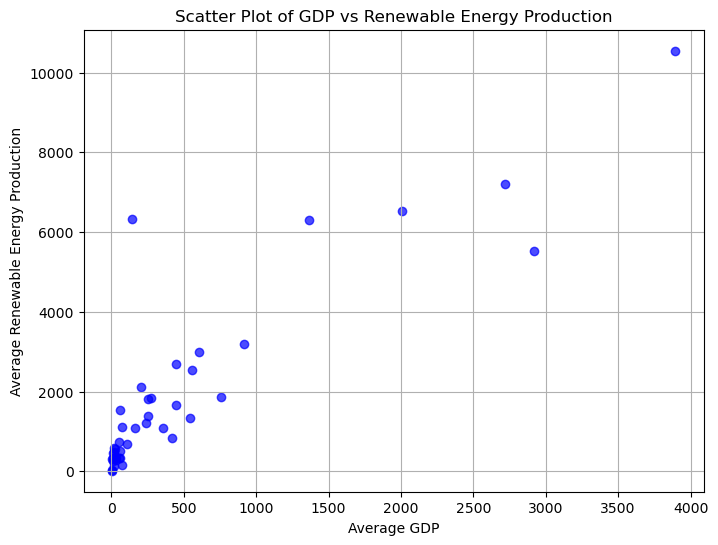

In [65]:
import matplotlib.pyplot as plt

# Дані для графіку
x = average_gdp['GDP']  # Середній ВВП
y = average_renewable_energy['Electricity_Installed_Capacity__MW_']  # Середнє виробництво енергії з відновлювальних джерел

# Побудова графіку розсіювання
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.title('Scatter Plot of GDP vs Renewable Energy Production')
plt.xlabel('Average GDP')
plt.ylabel('Average Renewable Energy Production')
plt.grid(True)
plt.show()


In [ ]:
# Графік показує розподіл середнього ВВП за віссю X та середнього виробництва енергії з відновлювальних джерел за віссю Y. 
# Кореляція визначена за розміщенням точок на графіку. 
# Точки розташовані близько одна до одної і напрямлені в одному напрямку, це вказу' на наявність позитивної кореляції.


In [ ]:
# Кореляція на рівні 0.89 між ВВП і виробництвом відновлювальної енергії свідчить про те, що існує досить сильна позитивна зв'язок 
# між цими двома показниками для розглянутих країн. Це означає, що зі зростанням ВВП в цих країнах ймовірність зростання виробництва 
# відновлювальної енергії також збільшується.

# Такий результат може свідчити про те, що країни із вищим рівнем економічного розвитку більш схильні інвестувати в відновлювальні джерела енергії, 
# що сприяє збереженню довкілля та створює нові можливості для економічного зростання.

In [70]:
# Створити pivot table
pivot_table_year = renewable_energy_data.pivot_table(index='Year', columns='RE_or_Non_RE', values='Electricity_Installed_Capacity__MW_', aggfunc='sum')

# Перейменувати стовпці для зручності
pivot_table_year.rename(columns={'Total Renewable': 'Total_Renewable', 'Total Non-Renewable': 'Total_Non_Renewable'}, inplace=True)

# Вивести результат
print(pivot_table_year)

RE_or_Non_RE  Total_Non_Renewable  Total_Renewable
Year                                              
2015                   661476.276       465121.006
2016                   649312.666       488668.776
2017                   640383.285       512996.314
2018                   644333.198       537481.639
2019                   625254.520       574837.777
2020                   613407.518       609123.480
2021                   604762.304       651431.987
2022                   599124.127       715535.319
2023                   595312.537       786780.985


C:\Users\Tetiana_Lopatynska\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tetiana_Lopatynska\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


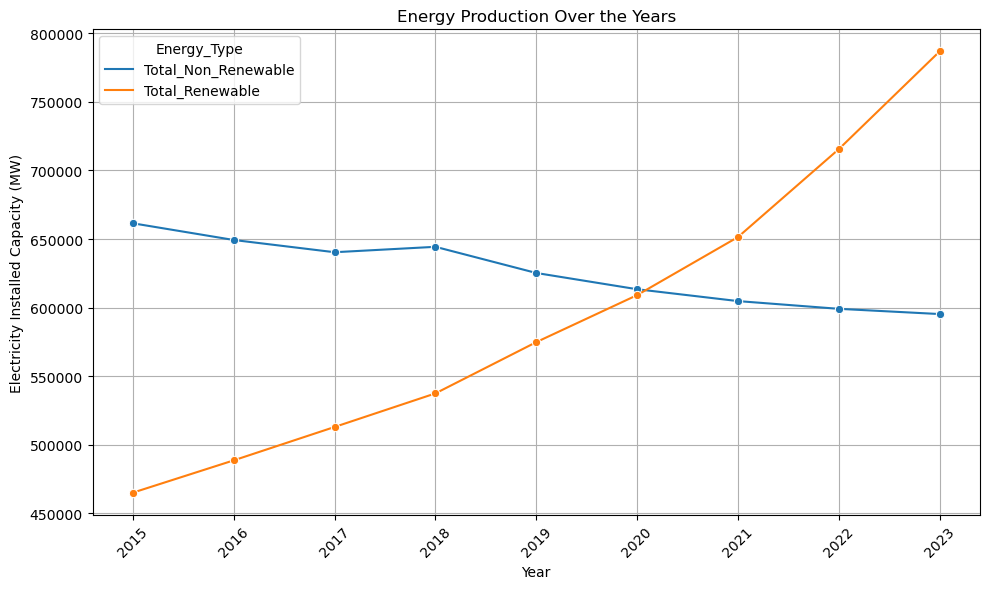

In [71]:
import seaborn as sns

# Перетворення таблиці у довгу форму
melted_df = pivot_table_year.reset_index().melt(id_vars='Year', var_name='Energy_Type', value_name='Electricity_Installed_Capacity__MW_')

# Побудова графіку за допомогою Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='Year', y='Electricity_Installed_Capacity__MW_', hue='Energy_Type', marker='o')
plt.title('Energy Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Electricity Installed Capacity (MW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Загальний висновок щодо динаміки вироблення енергії у країнах Європи на основі отриманих даних показує, 
# що виробництво енергії з відновлюваних джерел зростає протягом восьми років, в той час як виробництво енергії з невідновлюваних джерел знижується.
# У 2015 році вироблення енергії з відновлюваних джерел становило 465121.006 MW, а з невідновлюваних - 661476.276 MW. 
# Протягом наступних років виробництво енергії з відновлюваних джерел зростало, досягнувши найвищого показника у 2023 році (786780.985 MW), 
# тоді як виробництво енергії з невідновлюваних джерел поступово зменшувалося, досягнувши найнижчого показника у 2023 році (595312.537 MW).

# Таким чином, на основі цих даних можна зробити висновок, що країни Європи звертають більше уваги на виробництво енергії з відновлюваних джерел 
# та поступово відходять від використання невідновлюваних джерел енергії.